In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, f1_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.frozen import FrozenEstimator

# Professor Datta’s dataset

data = pd.DataFrame({

  'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],

  'Quiz_Score': [55, 60, 65, 70, 75, 80, 85, 90, 95, 100],

  'Pass/Fail': ['Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass']

})



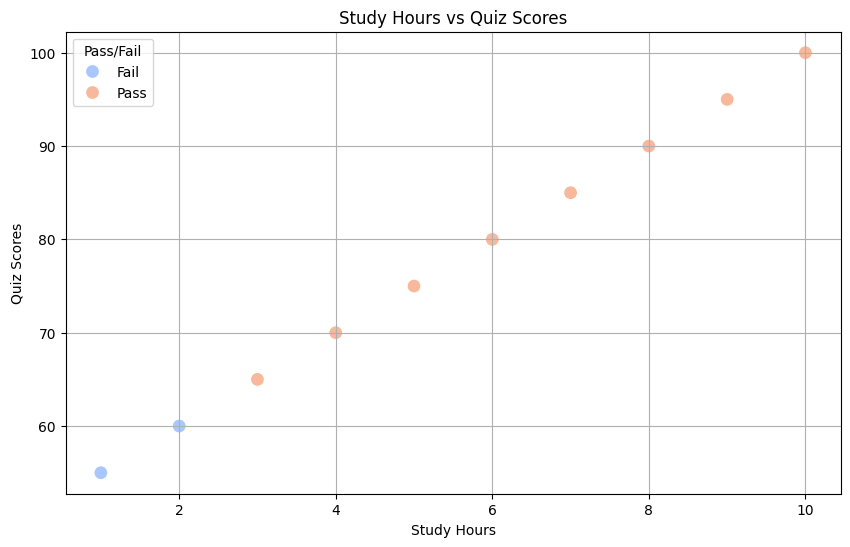

In [3]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Study_Hours', y='Quiz_Score', hue='Pass/Fail', data=data, palette='coolwarm', s=100)
plt.title('Study Hours vs Quiz Scores')
plt.xlabel('Study Hours')
plt.ylabel('Quiz Scores')
plt.grid(True)
plt.show()

In [10]:
study_hours = data['Study_Hours']
quiz_scores = data['Quiz_Score']
mean_score = np.mean(quiz_scores)
median_score = np.median(quiz_scores)
mode_score = data['Quiz_Score'].mode()[0]

In [11]:
print(f'Mean Quiz Score{mean_score:.2f}')
print(f'Median Quiz Score{median_score}')
print(f"Mode Quiz Score:{mode_score}")




Mean Quiz Score77.50
Median Quiz Score77.5
Mode Quiz Score:55


In [12]:
X = data[['Study_Hours']]
y = data['Quiz_Score']
linear_model = LinearRegression()
linear_model.fit(X,y)
predicted_scores = linear_model.predict(X)
r_squared = r2_score(y, predicted_scores)

In [13]:
print(f"Linear Regression R^2 Score{r_squared:.2f}")
print(f"Predicted Quiz Scores:{predicted_scores}")

Linear Regression R^2 Score1.00
Predicted Quiz Scores:[ 55.  60.  65.  70.  75.  80.  85.  90.  95. 100.]


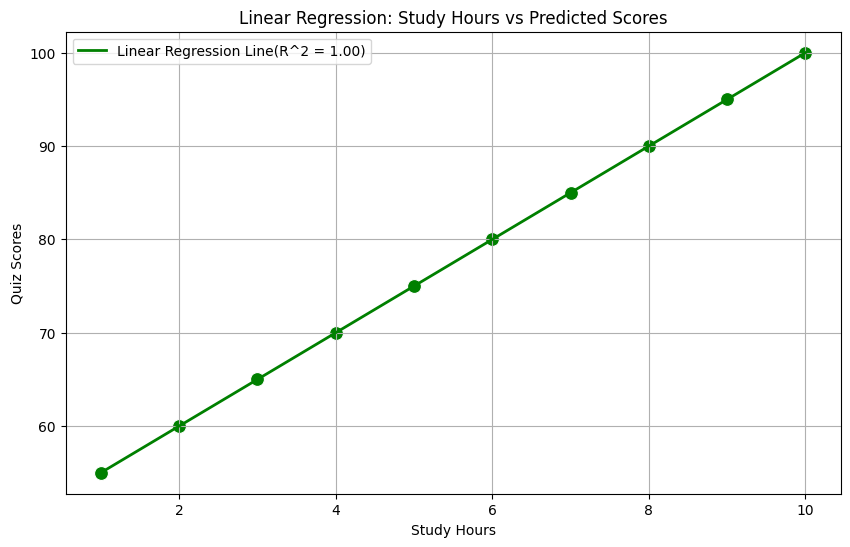

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Study_Hours', y = 'Quiz_Score', data=data, color='green', s=100)
plt.plot(data['Study_Hours'], predicted_scores, color='green', linewidth=2, label=f'Linear Regression Line(R^2 = {r_squared:.2f})')
plt.title('Linear Regression: Study Hours vs Predicted Scores')
plt.xlabel('Study Hours')
plt.ylabel("Quiz Scores")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
y_pass_fail = data['Pass/Fail'].map({'Fail': 0, 'Pass': 1})
logistic_model = LogisticRegression()
logistic_model.fit(X, y_pass_fail)
predicted_pass_fail = logistic_model.predict(X)
probabilities = logistic_model.predict_proba(X)[:, 1]
accuracy = accuracy_score(y_pass_fail, predicted_pass_fail)


print(f"Logistic Regression Accuracy{accuracy:.2f}")
print(f"Predicted Pass/Fail{predicted_pass_fail}")
print(f"Probabilities of Passing{probabilities}")


Logistic Regression Accuracy1.00
Predicted Pass/Fail[0 0 1 1 1 1 1 1 1 1]
Probabilities of Passing[0.17694478 0.39224617 0.65958043 0.8533011  0.94583512 0.98128139
 0.99368596 0.99788789 0.99929546 0.9997652 ]


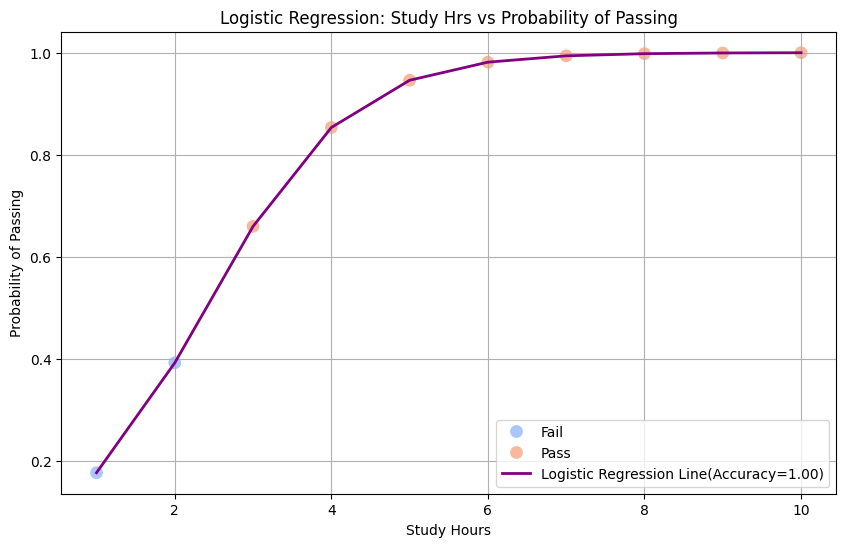

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X['Study_Hours'], y=probabilities, hue=data['Pass/Fail'], palette='coolwarm', s=100)
plt.plot(X, probabilities, color='purple', linewidth=2, label=f'Logistic Regression Line(Accuracy={accuracy:.2f})')
plt.title('Logistic Regression: Study Hrs vs Probability of Passing')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.legend()
plt.grid(True)
plt.show()



In [25]:
result_df = data.copy()
result_df['Predicted Quiz Score(Linear)'] = predicted_scores
result_df['Predicted Pass/Fail(Logistic)'] = ['Pass' if x==1 else 'Fail' for x in predicted_pass_fail]
result_df['Probability of Passing(Logistic)'] = probabilities

print('Extended Result with Predictions')
print(result_df)

Extended Result with Predictions
   Study_Hours  Quiz_Score Pass/Fail  Predicted Quiz Score(Linear)  \
0            1          55      Fail                          55.0   
1            2          60      Fail                          60.0   
2            3          65      Pass                          65.0   
3            4          70      Pass                          70.0   
4            5          75      Pass                          75.0   
5            6          80      Pass                          80.0   
6            7          85      Pass                          85.0   
7            8          90      Pass                          90.0   
8            9          95      Pass                          95.0   
9           10         100      Pass                         100.0   

  Predicted Pass/Fail(Logistic)  Probability of Passing(Logistic)  
0                          Fail                          0.176945  
1                          Fail                          0.3